In [ ]:
!pip install --upgrade kaggle
!pip install kaggle
!kaggle datasets list

ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset         Customer Shopping (Latest Trends) Dataset     76KB  2024-11-23 15:26:12          11929        236  1.0              
ashutosh598/shoes-price-for-various-brands                  Shoes price for various brands                32KB  2024-12-03 21:28:48           1204         23  1.0              
hopesb/student-depression-dataset                           Student Depression Dataset.                  454KB  2024-11-22 17:56:03           8447        113  0.9411765        
gauthamvijayaraj/spotify-tracks-dataset-updated-every-week  Spotify Tracks Dataset (Updated every week)    5MB  202

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadahaimn","key":"5051b2c6b805482c41f74c399be91dc1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!unzip brain-tumor-classification-mri.zip -d /content/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brain-tumor-classification-mri.zip
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/brain-tumor-classification-mri/Testing/glioma_tumor/image(15).jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten , Dense, MaxPooling2D ,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as wodgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2 as ocv
from sklearn.utils import shuffle
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

## Folder paths

In [ ]:
x_train =[]
y_train =[]
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor' ,'pituitary_tumor']

In [ ]:
for label in labels:
    folderPath = os.path.join('/content/brain-tumor-classification-mri', 'Training', label)
    for file in os.listdir(folderPath):
        img_path = os.path.join(folderPath, file)
        img = ocv.imread(img_path)
        if img is not None:
            img = ocv.resize(img, (image_size, image_size))
            x_train.append(img)
            y_train.append(label)

In [ ]:
for label in labels:
    folderPath = os.path.join('/content/brain-tumor-classification-mri', 'Testing', label)
    for file in os.listdir(folderPath):
        img_path = os.path.join(folderPath, file)
        img = ocv.imread(img_path)
        if img is not None:
            img = ocv.resize(img, (image_size, image_size))
            x_train.append(img)
            y_train.append(label)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train , y_train = shuffle(x_train , y_train , random_state=101 )
x_train.shape

(3264, 150, 150, 3)

## Train test split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_train , y_train , test_size = 0.1 , random_state =101 )

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

## Convolutional Nueral Network

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3) , activation='relu' , input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(Dropout(0,3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(Conv2D(256,(3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train , y_train , epochs=20 , validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 548s 7s/step - accuracy: 0.3526 - loss: 2.2401 - val_accuracy: 0.5442 - val_loss: 1.0571
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 544s 7s/step - accuracy: 0.5938 - loss: 0.9310 - val_accuracy: 0.6463 - val_loss: 0.8256
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 564s 7s/step - accuracy: 0.7019 - loss: 0.7213 - val_accuracy: 0.7721 - val_loss: 0.6309
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 564s 7s/step - accuracy: 0.7817 - loss: 0.5660 - val_accuracy: 0.7517 - val_loss: 0.6594
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 548s 7s/step - accuracy: 0.8351 - loss: 0.4286 - val_accuracy: 0.7959 - val_loss: 0.5459
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 564s 7s/step - accuracy: 0.8815 - loss: 0.3120 - val_accuracy: 0.8367 - val_loss: 0.4960
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 557s 7s/step - accuracy: 0.9338 - loss: 0.1898 - val_accuracy: 0.8673 - val_loss: 0.4227
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 570s 7s/step - accuracy: 0.9540 - loss: 0.1519 - val_accuracy: 0.8299 - v

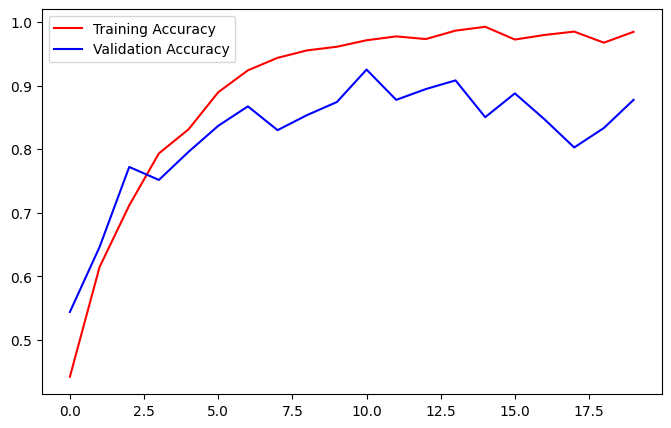

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(8,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

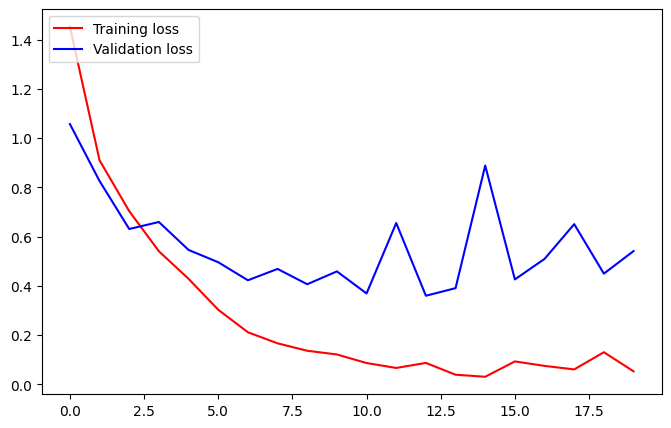

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(8,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()